# Face++

https://console.faceplusplus.com.cn/documents/4888373

![title](IMG/face.jpg)

In [1]:
# -*- coding: utf-8 -*-
import urllib.request
import urllib.error
import time
import json

http_url = 'https://api-cn.faceplusplus.com/facepp/v3/detect'
key = "********"
secret = "********"
filepath = r"IMG/face.jpg"

boundary = '----------%s' % hex(int(time.time() * 1000))
data = []
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'api_key')
data.append(key)
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'api_secret')
data.append(secret)
data.append('--%s' % boundary)
fr = open(filepath, 'rb')
data.append('Content-Disposition: form-data; name="%s"; filename=" "' % 'image_file')
data.append('Content-Type: %s\r\n' % 'application/octet-stream')
data.append(fr.read())
fr.close()
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'return_landmark')
data.append('1')
data.append('--%s' % boundary)
data.append('Content-Disposition: form-data; name="%s"\r\n' % 'return_attributes')
data.append(
    "gender,age,smiling,headpose,facequality,blur,eyestatus,emotion,ethnicity,beauty,mouthstatus,eyegaze,skinstatus")
data.append('--%s--\r\n' % boundary)

for i, d in enumerate(data):
    if isinstance(d, str):
        data[i] = d.encode('utf-8')

http_body = b'\r\n'.join(data)

# build http request
req = urllib.request.Request(url=http_url, data=http_body)

# header
req.add_header('Content-Type', 'multipart/form-data; boundary=%s' % boundary)

try:
    # post data to server
    resp = urllib.request.urlopen(req, timeout=5)
    # get response
    qrcont = resp.read()
    # if you want to load as json, you should decode first,
    # for example: json.loads(qrount.decode('utf-8'))
    json_get = json.loads(qrcont.decode('utf-8'))
except urllib.error.HTTPError as e:
    print(e.read().decode('utf-8'))

In [2]:
json_get

{'image_id': '5V4d2BL+eehtjIQiTLSS4Q==',
 'request_id': '1554905752,a7341c9d-e7e0-4403-9e27-6fe59c6214d5',
 'time_used': 521,
 'faces': [{'landmark': {'mouth_upper_lip_left_contour2': {'y': 432, 'x': 375},
    'mouth_upper_lip_top': {'y': 432, 'x': 406},
    'mouth_upper_lip_left_contour1': {'y': 429, 'x': 397},
    'left_eye_upper_left_quarter': {'y': 338, 'x': 362},
    'left_eyebrow_lower_middle': {'y': 308, 'x': 362},
    'mouth_upper_lip_left_contour3': {'y': 439, 'x': 380},
    'right_eye_top': {'y': 337, 'x': 440},
    'left_eye_bottom': {'y': 343, 'x': 371},
    'right_eyebrow_lower_left_quarter': {'y': 312, 'x': 432},
    'right_eye_pupil': {'y': 340, 'x': 440},
    'mouth_lower_lip_right_contour1': {'y': 449, 'x': 414},
    'mouth_lower_lip_right_contour3': {'y': 463, 'x': 412},
    'mouth_lower_lip_right_contour2': {'y': 455, 'x': 420},
    'contour_chin': {'y': 512, 'x': 396},
    'contour_left9': {'y': 512, 'x': 365},
    'left_eye_lower_right_quarter': {'y': 343, 'x': 380

In [5]:
json_get.keys()

dict_keys(['image_id', 'request_id', 'time_used', 'faces'])

In [6]:
len(json_get['faces'])

2

In [7]:
json_get['faces'][0].keys()

dict_keys(['landmark', 'attributes', 'face_rectangle', 'face_token'])

In [8]:
json_get['faces'][0]['attributes'].keys()

dict_keys(['emotion', 'beauty', 'gender', 'age', 'mouthstatus', 'glass', 'skinstatus', 'headpose', 'blur', 'smile', 'eyestatus', 'facequality', 'ethnicity', 'eyegaze'])

In [9]:
json_get['faces'][0]['attributes']['age']

{'value': 39}

In [10]:
json_get['faces'][0]['face_rectangle']

{'width': 220, 'top': 291, 'left': 244, 'height': 220}

In [11]:
import cv2
import numpy as np

pic = cv2.imread('face.jpg')

np.shape(pic)

(881, 1255, 3)

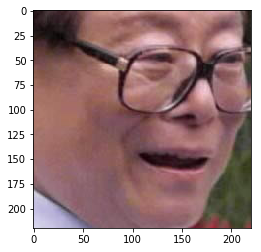

In [13]:
rect = json_get['faces'][0]['face_rectangle']
face_0 = pic[rect['top']:rect['top'] + rect['height'], rect['left']:rect['left'] + rect['width']]

from matplotlib import pyplot as plt

face_0 = face_0[:,:,::-1]
plt.imshow(face_0)

# 百度OCR

https://ai.baidu.com/docs#/OCR-API/top

![title](IMG/list.jpg)

In [3]:
#coding=utf-8

from aip import AipOcr

APP_ID = '********'

API_KEY = '********'

SECRET_KEY = '********'

client = AipOcr(APP_ID, API_KEY, SECRET_KEY)

 

def get_file_content(filePath):

    with open(filePath, 'rb') as fp:

        return fp.read()

 

options = {

        'detect_direction': 'true',

        'language_type': 'ENG',

        'detect_risk': 'false',

}


image = get_file_content('IMG/list.jpg')

res = client.general(image, options)

In [4]:
res

{'log_id': 8015907382249004010,
 'direction': 0,
 'words_result_num': 89,
 'words_result': [{'location': {'width': 169,
    'top': 102,
    'left': 761,
    'height': 31},
   'words': 'PACKING LIST'},
  {'location': {'width': 285, 'top': 228, 'left': 164, 'height': 28},
   'words': 'Tyco Safety Products ( SHENYANG ) Co . , LT'},
  {'location': {'width': 101, 'top': 236, 'left': 882, 'height': 21},
   'words': '( a ) Invoice No'},
  {'location': {'width': 86, 'top': 237, 'left': 1297, 'height': 20},
   'words': 'INVC000467'},
  {'location': {'width': 113, 'top': 262, 'left': 162, 'height': 21},
   'words': '33 SHWI ROAD'},
  {'location': {'width': 110, 'top': 269, 'left': 886, 'height': 21},
   'words': 'b ) Invoice Date'},
  {'location': {'width': 61, 'top': 270, 'left': 1321, 'height': 20},
   'words': '16-Jan-1'},
  {'location': {'width': 176, 'top': 293, 'left': 165, 'height': 24},
   'words': 'HUNNAN NEW DISTRICT'},
  {'location': {'width': 198, 'top': 299, 'left': 521, 'height': 2